In [ ]:
# 대학원 입학 여부 데이터를 가지고
# Logistic regression을 Tensorflow Keras로 구현해보아요!

# 1. 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. 데이터 전처리를 위한 module
# 결측치 처리 => pandas DataFrame
# 이상치 처리 => Tukey's Fence 방식으로 처리 -> numpy
#                정규분포상의 Z-Score 값을 이용해서 처리 -> scipy
# 정규화 처리 => 최대최소값을 이용한 Min-Max Normalization -> sklearn
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# 3. Model 구현을 위한 Tensorflow module
# Model
from tensorflow.keras.models import Sequential
# Layer
from tensorflow.keras.layers import Flatten, Dense
# Optimizer
from tensorflow.keras.optimizers import SGD

In [ ]:
# 1. Raw Data Loading
# 데이터가 있어야 모델을 학습시킬 수 있어요!
# 데이터는 어디서 가져오나요?
# 파일(CSV), Database, Open API(JSON), 직접 입력!
# 최대한 많은 데이터를 확보해야 해요!
# 우리는 지금 Logistic Regression을 하고 있어요!
# 우리 데이터의 종속변수는 0 아니면 1로 표현이 될거에요!
# 수집한 데이터에 0의 비율이 90%, 1의 비율이 10% => 이런 경우는 문제에요!
# 데이터의 불균형 문제가 발생할 수 있는데,(ex. 희귀병 환자 데이터)
# 이런것도 적절히 처리하면서 균형적인 데이터를 최대한 많이 확보할 필요가 있어요!
df = pd.read_csv('/content/drive/MyDrive/KDT/data/admission.csv')
display(df) # 정상적으로 로딩되었는지 확인 ! (400, 4)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [ ]:
# 2. 데이터 전처리
# 확보한 데이터를 적절하게 전처리를 하지 않으면
# 머신러닝 입력(학습의 용도)으로 사용할 수 없어요!
# 어떻게 전처리를 하느냐에 따라 모델의 성능이 달라져요!

# 2-1. 결측치 처리(Missing Value 처리) : 삭제(Deletion), 수정(Imputation)
#      결측치가 존재하는지 다양한 방법으로 확인! 지금은 없음!
#      일반적인 경우는 결측치 다수 존재
# isnull을 사용한 결측치 확인
print(df.isnull().sum(axis=0), '\n')
# info를 사용한 결측치 확인
df.info()

admit    0
gre      0
gpa      0
rank     0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


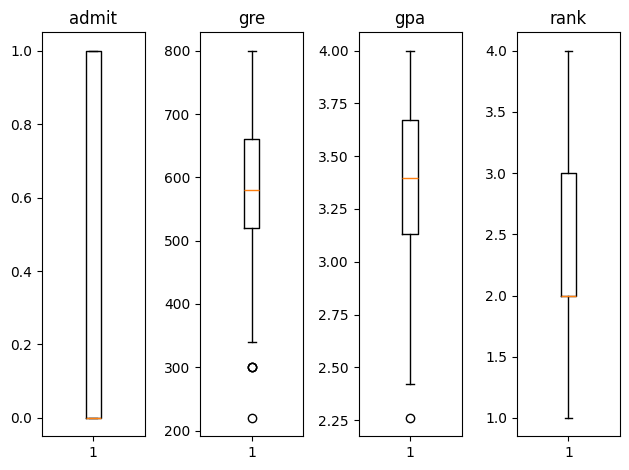

In [ ]:
# 2-2. 이상치 처리(Outlier 처리)
# 원래 이상치는 이상한 값을 지칭하는 용어에요!
# 독립변수에 존재하는 이상한 값 => 지대점
# 종속변수에 존재하는 이상한 값 => outlier(이상치)
# 종속변수와 독립변수 상관없이 이상한 값은 이상치(outlier)라고 부를거에요!
# 눈으로 확인해보면 좋아요!
# -> boxplot을 이용하면 아주 쉽게 이상치의 존재여부를 확인할 수 있어요!
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.set_title('admit')
ax2.set_title('gre')
ax3.set_title('gpa')
ax4.set_title('rank')

ax1.boxplot(df['admit'])
ax2.boxplot(df['gre'])
ax3.boxplot(df['gpa'])
ax4.boxplot(df['rank'])

plt.tight_layout()
plt.show()

In [ ]:
# 이상치가 있는지 확인되었으니 이제 실제 이상치 처리를 해보아요!
# 이상치는 제거할건지 아니면 수정할건지 우리가 선택해야 해요!
# 모든 컬럼(독립변수 & 종속변수)에 대해서 이상치를 제거할거에요!
# 이상치 판별하기 위해서 zscore를 이용할거에요!
# 각 컬럼에 대해 이상치를 제거한 후 DataFrame을 수정.
# gre 컬럼에 대해서 이상치를 판별해서 이상치를 제거하는 코드를 작성
zscore_threshold = 2.0

for col in df.columns:
    outlier = df[col][np.abs(stats.zscore(df[col])) > zscore_threshold]
    mask = ~df[col].isin(outlier)
    df = df.loc[mask]

print(df.shape) # (382, 4)

(382, 4)


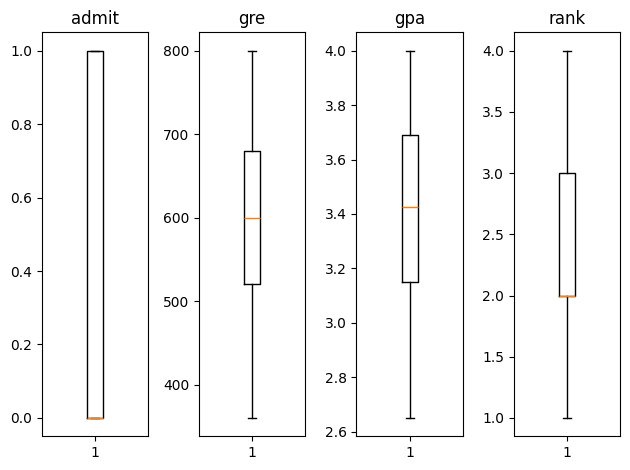

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.set_title('admit')
ax2.set_title('gre')
ax3.set_title('gpa')
ax4.set_title('rank')

ax1.boxplot(df['admit'])
ax2.boxplot(df['gre'])
ax3.boxplot(df['gpa'])
ax4.boxplot(df['rank'])

plt.tight_layout()
plt.show()

In [ ]:
# 2-3. 정규화(Normalization)
# Minmax Normalization을 수행할거에요!
# 정규화하기 전에 독립변수와 종속변수를 분리하는게 편해요!
x_data = df.drop('admit', axis=1, inplace=False).values
t_data = df['admit'].values.reshape(-1, 1)

# 정규화를 도와주는 Scaler객체를 생성해요!
# t_data는 0과 1로 이루어져 있기 때문에 정규화 필요 X
scaler = MinMaxScaler()
scaler.fit(x_data) # scaler에 최대, 최소값을 알려줘요!
x_data_norm = scaler.transform(x_data)

In [ ]:
# 이제 모델 구현을 해보아요!
# Tensorflow Keras로 구현할 때는 모델 그림을 그리면 되요!
# model 생성
model = Sequential()

# layer 추가
model.add(Flatten(input_shape=(3,)))
model.add(Dense(units=1, activation='sigmoid'))

# model 설정
model.compile(optimizer=SGD(learning_rate=1e-4), loss='binary_crossentropy')

# 학습 진행
model.fit(x_data_norm, t_data, epochs=500, verbose=1)

# 출력되는 내용을 보고 2가지 정도만 일단 확인하면되요!
# loss값이 너무 크지 않은지 확인!
# loss의 최솟값은 0인데, 가능한 0과 가까운 아주 작은 값일 수록 좋아요!
# 그런데 이게 좀 애매해요!
# 출력되는 loss 값은 학습에 사용되는 데이터 값에 따라서 들쭉날쭉해요!
# 한마디로 이 값으로 loss 값이 좋다 나쁘다를 말하기 힘들어요!
# 이거보다 더 중요한 거는...
# Epoch이 증가할 때마다 당연히 loss 값은 작아져야 정상!

In [ ]:
# 모델이 잘 만들어졌으니 예측해야 해요!
# 예측하고자 하는 데이터는
# np.array([[600, 3.8, 1]])
# 당연히 정규화를 진행한 후 예측진행!
result = model.predict(scaler.transform(np.array([[600, 3.8, 1]])))
print(result) # [[0.52286637]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.52286637]]


In [ ]:
# learning_rate를 다르게 해서 학습을 진행해 보아요!
# model 생성
model = Sequential()

# layer 추가
model.add(Flatten(input_shape=(3,)))
model.add(Dense(units=1, activation='sigmoid'))

# model 설정
model.compile(optimizer=SGD(learning_rate=1e-2), loss='binary_crossentropy')

# 학습 진행
model.fit(x_data_norm, t_data, epochs=500, verbose=1)

In [ ]:
result = model.predict(scaler.transform(np.array([[600, 3.8, 1]])))
print(result) # [[0.5626417]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.5626417]]


In [ ]:
# 학습이 잘 되었다고 가정하면
# 우리 모델을 평가해야 해요!
# 우리 모델이 정말 잘 만들어졌는지 평가기법을 이용해서 확인!

In [ ]:
# Admission 예제를 이용해서
# Logistic Regression을 구현하고
# 성능평가까지 진행해 보아요!
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 전처리 관련
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# 데이터 분할에 관련된 모듈
from sklearn.model_selection import train_test_split

# Model 구현
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
# 1. Raw Data Loading
admission = pd.read_csv('/content/drive/MyDrive/KDT/data/admission.csv')


# 기존과는 다르게 독립변수를 2개만 쓸거에요! (gre, gpa)
df = admission[['gre', 'gpa', 'admit']]
display(df)

,gre,gpa,admit
0,380,3.61,0
1,660,3.67,1
2,800,4.00,1
3,640,3.19,1
4,520,2.93,0
...,...,...,...
395,620,4.00,0
396,560,3.04,0
397,460,2.63,0
398,700,3.65,0


In [ ]:
# 2. 데이터 전처리
# 2-1. 결측치 처리
# 현재 우리 데이터에는 결측치 없어요!

# 2-2. 이상치 처리
# 수치적인 이상치는 존재해요. (boxplot으로 확인이 가능!)
# 하지만 실제 데이터이기 때문에 이상치로 분류하지 않을거에요!

# 2-3. 정규화 처리
# 데이터 분리(독립변수와 종속변수)부터 하는게 편해요!
x_data = df[['gre', 'gpa']].values
t_data = df['admit'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 2-4. 학습 데이터와 평가 데이터 분리 (확인까지 진행!)
(x_data_train_norm, x_data_test_norm, t_data_train, t_data_test) = \
train_test_split(x_data_norm, t_data, test_size=0.3, stratify=t_data, random_state=2)

In [ ]:
# Model 구현
model = Sequential()

model.add(Flatten(input_shape=(2,)))
model.add(Dense(units=1, activation='sigmoid'))

# 이번에는 모델 학습을 진행하면서 validation data를 이용해서
# 각 epoch 마다 평가를 진행(평가에 대한 metric은 우리가 지정!)
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_data_train_norm, t_data_train,
          epochs=500, verbose=1,
          validation_split=0.2)
# accuracy: 0.3225 - loss: 0.7745 - val_accuracy: 0.4464 - val_loss: 0.7399 (learning_rate=1e-4)
# accuracy: 0.6839 - loss: 0.6073 - val_accuracy: 0.6071 - val_loss: 0.6585 (learning_rate=1e-2)